In [39]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [40]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
# import seaborn as sns
rcParams['figure.figsize']=15,5
from numpy import nan

In [41]:
# Stations = ['Batseri kinnaur','ddharmshalakangara','ghoda_farm3_mandi','ghoda_farm5_mandi',
#             'griffon peak_2','griffon peak5 mandi','kuppa_data','nigulasridata','pagalnala_data',
#             'purbani_kinnaur','sanarli_1_mandi','sanarli_3_mandi','sandhol kangra','Tattapani Mandi',
#             'urni_dhank_kinnaur']

In [300]:
Stations = os.listdir('Deep_clean_dataset')
Stations.remove('.DS_Store')


In [301]:
Stations

['deep_LMS Data - Rulehr_Shahpur_Kangra.csv',
 'deep_LMS Data - macleodganj kangra.csv',
 'deep_LMS Data - Sanarli_2_Mandi.csv',
 'deep_LMS Data - Ghoda Farm 5.csv',
 'deep_LMS Data - Ghoda Farm 4.csv',
 'deep_LMS Data - Pagal_Nala_Kinnaur.csv',
 'deep_LMS Data - Ghoda Farm 3.csv',
 'deep_LMS Data - Purbani_Kinnaur.csv',
 'deep_LMS Data - Kuppa_Kinnaur.csv',
 'deep_LMS Data - Sanarli_3_Mandi.csv',
 'deep_LMS Data - Urni_Dhank_Kinnaur.csv',
 'deep_LMS Data - dharamshala kangra.csv',
 'deep_LMS Data - Batseri_Kinnaur.csv',
 'deep_LMS Data - Nigulsari_Kinnaur.csv',
 'deep_LMS Data - Garudnala_Mandi.csv',
 'deep_LMS Data - griffon peak 3.csv',
 'deep_LMS Data - chola kangra.csv',
 'deep_LMS Data - Ghoro_Farm_2.csv',
 'deep_LMS Data - griffon peak 5.csv',
 'deep_LMS Data - griffon peak 4.csv',
 'deep_LMS Data - Ghoro_Farm_1.csv',
 'deep_LMS Data - Sanarli_1_Mandi.csv',
 'deep_LMS Data - Griffon peak 6.csv']

In [302]:
len(Stations)

23

0
Number of rows and columns: (6194, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
1
Number of rows and columns: (5434, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
2
Number of rows and columns: (23790, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 

20
Number of rows and columns: (14875, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 True
Count:		 True
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
21
Number of rows and columns: (69, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 False
Ay:		 False
Az:		 False
Wx:		 False
Wy:		 False
Wz:		 False
Moisture:	 False
Count:		 False
22
Number of rows and columns: (1906, 15)
Date:		 False
Tem:		 False
Hum:		 False
Pressure:	 False
Rain:		 False
Light:		 False
Ax:		 True
Ay:		 True
Az:		 Fal

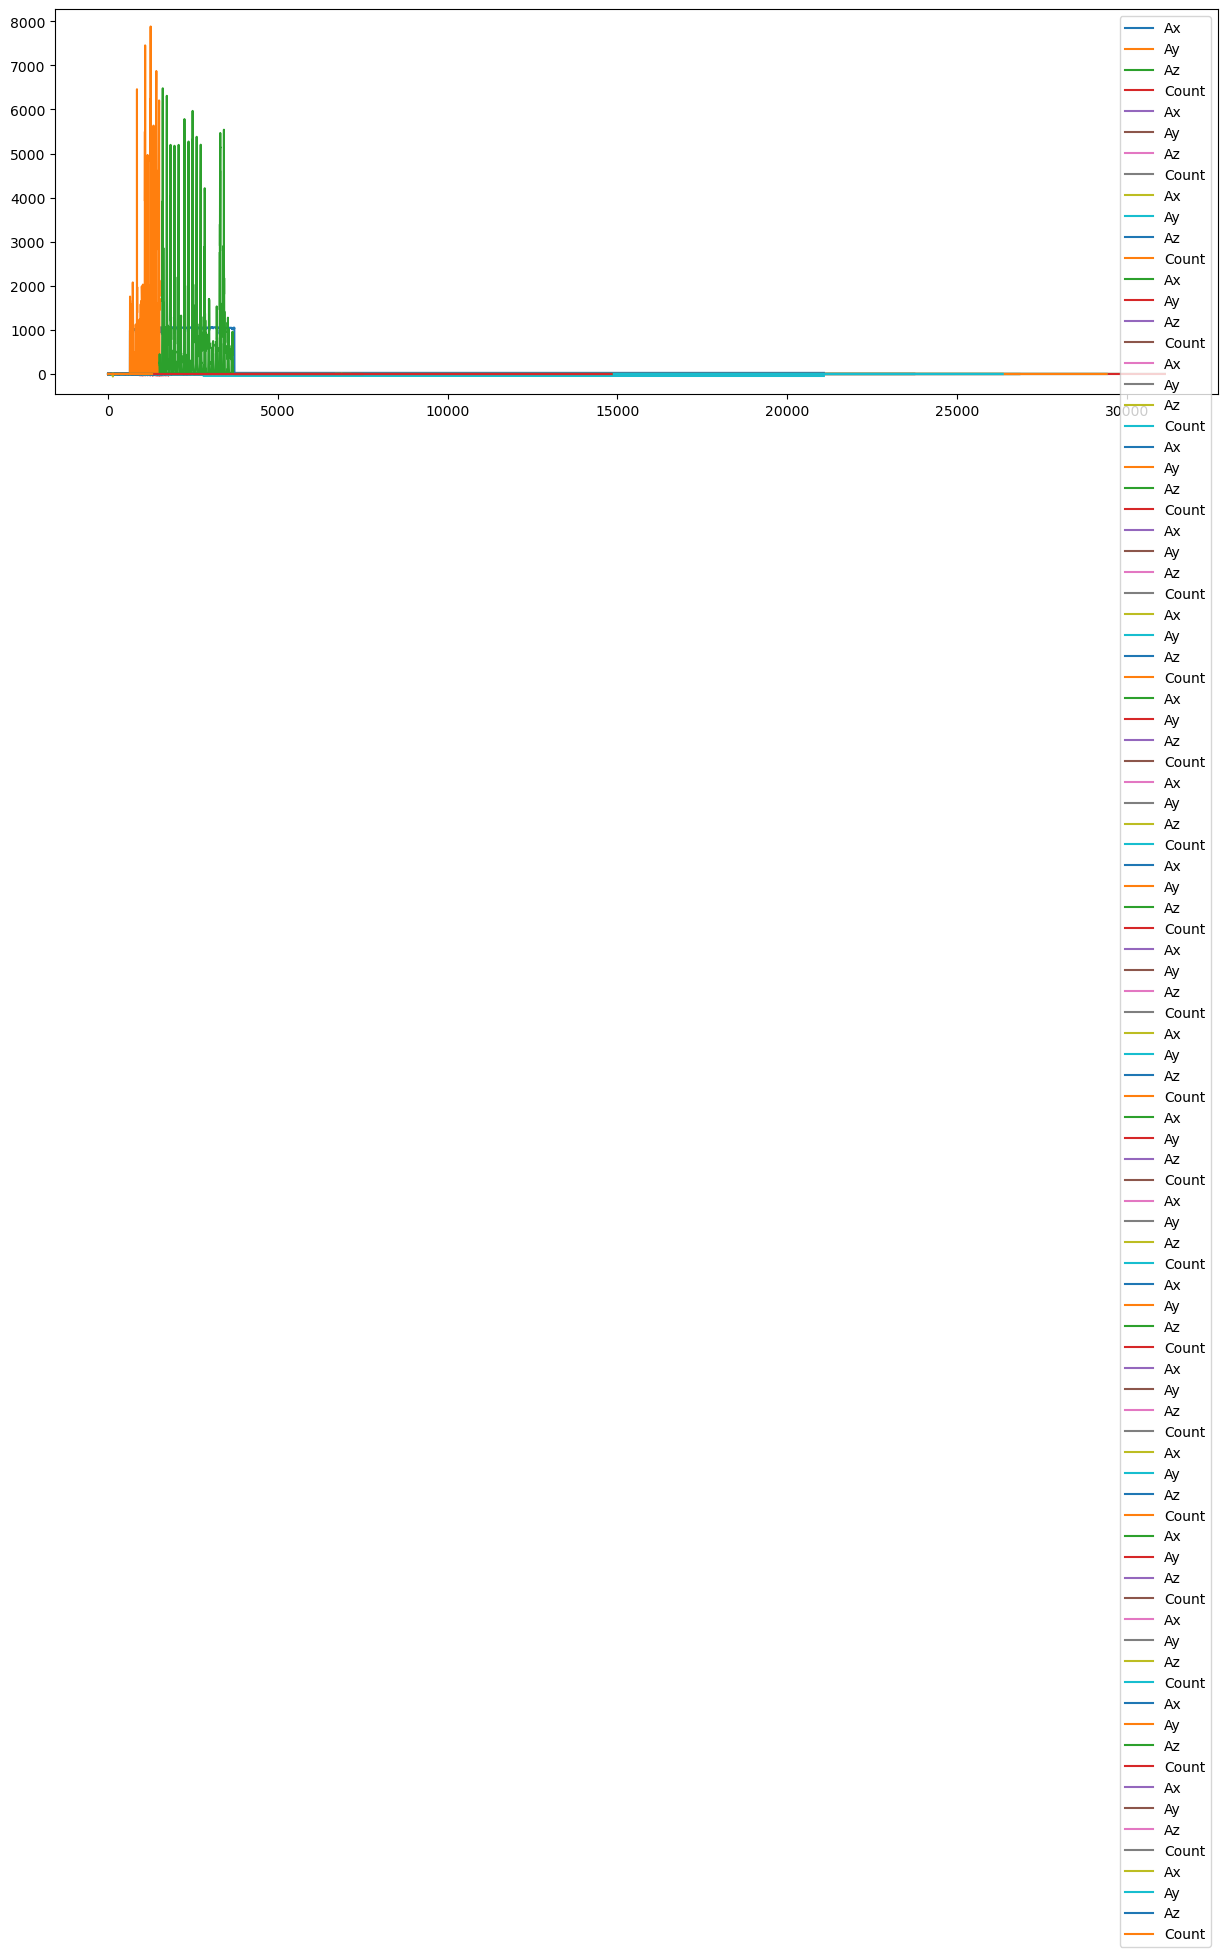

In [303]:
for s in range(len(Stations)):
    print(s)
    file = Stations[s]
    newfile = 'clean_'+file
    df = pd.read_csv('Deep_clean_dataset/'+file, header=0, index_col=None)
    print('Number of rows and columns:', df.shape)
    df = df.reset_index(drop=True)
    df.head()

    df.dtypes
    Column = ['Date','Tem','Hum','Pressure','Rain','Light','Ax','Ay','Az','Wx','Wy','Wz','Moisture','Count']
    newdf = df[Column].copy()
    dfWithoutNaN = newdf.dropna(axis=0,how='all',inplace=False)
    for col in Column:
        status = dfWithoutNaN[col].isnull().values.any()
        if col in ['Pressure', 'Moisture']:
            print(str(col)+':\t '+str(status))
        else:   
            print(str(col)+':\t\t '+str(status))

    new = dfWithoutNaN[dfWithoutNaN.Ax.notnull()]
    new1 = new[new.Ay.notnull()]
    new2 = new1[new.Az.notnull()]
    new3 = new2[new.Wx.notnull()]
    new4 = new3[new.Wy.notnull()]
    dfCleanAxWx = new4[new.Wz.notnull()]


    new5 = dfCleanAxWx
    new6 = new5[new5.Ax != 0]
    new7 = new6[new6.Ay != 0]
    new8 = new7[new7.Az != 0]
    new9 = new8[new8.Wx != 0]
    new0 = new9[new9.Wy != 0]
    dfDeleteZeroAxWx = new0[new0.Wz != 0]
    dffillna = dfCleanAxWx.fillna(0)
    for col in Column:
        status = dffillna[col].isnull().values.any()
        if col in ['Pressure', 'Moisture']:
            print(str(col)+':\t '+str(status))
        else:   
            print(str(col)+':\t\t '+str(status))

    dfReverse = dffillna[::-1]
    dfReverse.reset_index(inplace=True, drop=True)
    newdfReverse = dfReverse[50:]
    newdfReverse.reset_index(inplace=True, drop=True)

    Ax = newdfReverse['Ax'][0]
    Ay = newdfReverse['Ay'][0]
    Az = newdfReverse['Az'][0]
    Wx = newdfReverse['Wx'][0]
    Wy = newdfReverse['Wy'][0]
    Wz = newdfReverse['Wz'][0]

    newdfReverse['Ax'] = newdfReverse['Ax']-Ax
    newdfReverse['Ay'] = newdfReverse['Ay']-Ay
    newdfReverse['Az'] = newdfReverse['Az']-Az
    newdfReverse['Wx'] = newdfReverse['Wx']-Wx
    newdfReverse['Wy'] = newdfReverse['Wy']-Wy
    newdfReverse['Wz'] = newdfReverse['Wz']-Wz

    plt.plot(newdfReverse['Ax'],label='Ax')
    plt.plot(newdfReverse['Ay'],label='Ay')
    plt.plot(newdfReverse['Az'],label='Az')
    plt.plot(newdfReverse['Count']/100,label='Count')
    plt.legend()

    M=newdfReverse['Moisture'].values
    maxvalue=np.max(M)
    minvalue=np.min(M)
    T = (M-minvalue)/(maxvalue-minvalue)*100
    T = np.around(T,0)

    maxvalue,minvalue

    newdfReverse['Moisture']=T
    newdfReverse.to_csv('Clean-dataset-LMS/'+newfile)